In [85]:
!pip3 install h2o

In [86]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [87]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [88]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,37 mins 43 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_y20yk3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.076 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [89]:
heart_data = pd.read_csv("https://raw.githubusercontent.com/badani-yash/Heart-Disease-Prediction/main/heart.csv")

In [90]:
print(f"• Number of Records: {heart_data.shape[0]:,.0f}")
print(f"• Number of Features: {heart_data.shape[1]}")

• Number of Records: 918
• Number of Features: 12


In [91]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [92]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [93]:
# Summary of All Categorical Data
heart_data.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [94]:
# Check Nan Values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [95]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [96]:
heart_data.select_dtypes(include="object").columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [97]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Assuming 'heart_data' is already loaded into your DataFrame
# heart_data = pd.read_csv('path_to_your_data.csv')

# Initialize the encoders
onehot_encoder = OneHotEncoder(sparse=False)
ordinal_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])

# Applying OneHotEncoder to the specified columns
onehot_columns = ['Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG']
for column in onehot_columns:
    # Fit and transform the data
    transformed_data = onehot_encoder.fit_transform(heart_data[[column]])
    # Create DataFrame with encoded data and column names
    transformed_df = pd.DataFrame(transformed_data, columns=[f"{column}_{category}" for category in onehot_encoder.categories_[0]])
    # Drop original column from heart_data
    heart_data.drop(column, axis=1, inplace=True)
    # Concatenate the new DataFrame to the original heart_data
    heart_data = pd.concat([heart_data, transformed_df], axis=1)

# Applying OrdinalEncoder to 'ST_Slope'
heart_data['ST_Slope'] = ordinal_encoder.fit_transform(heart_data[['ST_Slope']])

# Verify the transformed DataFrame
print(heart_data.head())



   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ST_Slope  \
0   40        140          289          0    172      0.0       2.0   
1   49        160          180          0    156      1.0       1.0   
2   37        130          283          0     98      0.0       2.0   
3   48        138          214          0    108      1.5       1.0   
4   54        150          195          0    122      0.0       2.0   

   HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  ExerciseAngina_Y  \
0             0    0.0    1.0               1.0               0.0   
1             1    1.0    0.0               1.0               0.0   
2             0    0.0    1.0               1.0               0.0   
3             1    1.0    0.0               0.0               1.0   
4             0    0.0    1.0               1.0               0.0   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                0.0                1.0                0.0               0.0  

In [98]:
heart_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,2.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,49,160,180,0,156,1.0,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,2.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,2.0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [99]:
X = heart_data.drop("HeartDisease",axis=1)

In [100]:
heart_train, heart_test = train_test_split(heart_data, test_size=0.2, random_state=25)

In [101]:
heart_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
803,62,140,394,0,157,1.2,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,29,140,263,0,170,0.0,2.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
696,35,120,198,0,130,1.6,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
234,54,140,309,0,140,0.0,2.0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
531,64,143,306,1,115,1.8,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,108,267,0,167,0.0,2.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
811,58,100,248,0,122,1.0,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
831,63,135,252,0,172,0.0,2.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
53,41,130,245,0,150,0.0,2.0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [102]:
heart_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
748,64,120,246,0,96,2.2,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
575,56,137,282,1,126,1.2,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
588,67,140,219,0,122,2.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,39,130,307,0,140,0.0,2.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
236,41,120,336,0,118,3.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,56,140,0,1,121,1.8,2.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
143,53,140,243,0,155,0.0,2.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
474,62,131,0,0,130,0.1,2.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
318,61,130,0,1,77,2.5,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
X_train = heart_train.drop("HeartDisease",axis=1)
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
748,64,120,246,0,96,2.2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
575,56,137,282,1,126,1.2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
588,67,140,219,0,122,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,39,130,307,0,140,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
236,41,120,336,0,118,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,56,140,0,1,121,1.8,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
143,53,140,243,0,155,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
474,62,131,0,0,130,0.1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
318,61,130,0,1,77,2.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [104]:
x=list(X_train.columns)
x

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST']

In [105]:
X_test = heart_test.drop("HeartDisease",axis=1)
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
803,62,140,394,0,157,1.2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,29,140,263,0,170,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
696,35,120,198,0,130,1.6,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
234,54,140,309,0,140,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
531,64,143,306,1,115,1.8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,108,267,0,167,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
811,58,100,248,0,122,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
831,63,135,252,0,172,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
53,41,130,245,0,150,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [106]:
heart_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
748,64,120,246,0,96,2.2,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
575,56,137,282,1,126,1.2,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
588,67,140,219,0,122,2.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,39,130,307,0,140,0.0,2.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
236,41,120,336,0,118,3.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,56,140,0,1,121,1.8,2.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
143,53,140,243,0,155,0.0,2.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
474,62,131,0,0,130,0.1,2.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
318,61,130,0,1,77,2.5,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
heart_train.to_csv('heart_train.csv', index=False)
heart_test.to_csv('heart_test.csv', index=False)

In [108]:
from google.colab import files

files.download('heart_train.csv')
files.download('heart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
heart_train = h2o.import_file('https://raw.githubusercontent.com/badani-yash/Heart-Disease-Prediction/main/heart_train.csv')
heart_test = h2o.import_file('https://raw.githubusercontent.com/badani-yash/Heart-Disease-Prediction/main/heart_test.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [110]:
heart_test

Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
62,140,394,0,157,1.2,1,0,1,0,1,0,1,0,0,0,1,0,0
29,140,263,0,170,0,2,0,0,1,1,0,0,1,0,0,0,1,0
35,120,198,0,130,1.6,1,1,0,1,0,1,1,0,0,0,0,1,0
54,140,309,0,140,0,2,0,1,0,1,0,0,1,0,0,0,0,1
64,143,306,1,115,1.8,1,1,0,1,0,1,1,0,0,0,0,0,1
58,128,259,0,130,3,1,1,0,1,0,1,1,0,0,0,1,0,0
59,140,0,0,117,1,1,1,0,1,0,1,1,0,0,0,0,0,1
72,160,0,0,114,1.6,1,0,0,1,1,0,0,0,1,0,1,0,0
66,120,0,0,120,-0.5,2,0,0,1,1,0,0,0,1,0,0,0,1
65,160,0,1,122,1.2,1,1,0,1,1,0,1,0,0,0,0,0,1


In [111]:
X_train = heart_train.drop("HeartDisease",axis=1)
X_train

Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
64,120,246,0,96,2.2,0,0,1,0,1,1,0,0,0,1,0,0
56,137,282,1,126,1.2,1,0,1,0,1,1,0,0,0,0,1,0
67,140,219,0,122,2,1,0,1,0,1,1,0,0,0,0,0,1
39,130,307,0,140,0,2,0,1,1,0,1,0,0,0,0,1,0
41,120,336,0,118,3,1,0,1,0,1,1,0,0,0,0,1,0
55,120,220,0,134,0,2,0,1,1,0,0,0,1,0,1,0,0
49,134,271,0,162,0,1,1,0,1,0,0,1,0,0,0,1,0
62,120,220,0,86,0,2,0,1,1,0,0,0,1,0,1,0,0
51,140,0,0,60,0,1,0,1,1,0,1,0,0,0,0,1,0
60,135,0,0,63,0.5,2,0,1,0,1,1,0,0,0,0,1,0


In [112]:
X=X_train.col_names
X

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST']

In [113]:
x=list(X_train.columns)
x

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST']

In [114]:
X_test = heart_test.drop("HeartDisease",axis=1)
X_test

Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
62,140,394,0,157,1.2,1,1,0,1,0,1,0,0,0,1,0,0
29,140,263,0,170,0,2,0,1,1,0,0,1,0,0,0,1,0
35,120,198,0,130,1.6,1,0,1,0,1,1,0,0,0,0,1,0
54,140,309,0,140,0,2,1,0,1,0,0,1,0,0,0,0,1
64,143,306,1,115,1.8,1,0,1,0,1,1,0,0,0,0,0,1
58,128,259,0,130,3,1,0,1,0,1,1,0,0,0,1,0,0
59,140,0,0,117,1,1,0,1,0,1,1,0,0,0,0,0,1
72,160,0,0,114,1.6,1,0,1,1,0,0,0,1,0,1,0,0
66,120,0,0,120,-0.5,2,0,1,1,0,0,0,1,0,0,0,1
65,160,0,1,122,1.2,1,0,1,1,0,1,0,0,0,0,0,1


In [115]:
y='HeartDisease'

In [116]:
aml = H2OAutoML(max_models=20,seed=10,verbosity="debug",nfolds=5)
aml.train(x=x, y=y, training_frame=heart_train)

AutoML progress: |
01:36:47.632: Project: AutoML_2_20240423_13647
01:36:47.632: Setting stopping tolerance adaptively based on the training frame: 0.03691067352627811
01:36:47.632: Build control seed: 10
01:36:47.633: training frame: Frame key: AutoML_2_20240423_13647_training_heart_train2.hex    cols: 19    rows: 734  chunks: 1    size: 7658  checksum: 524407938071309554
01:36:47.633: validation frame: NULL
01:36:47.633: leaderboard frame: NULL
01:36:47.633: blending frame: NULL
01:36:47.633: response column: HeartDisease
01:36:47.633: fold column: null
01:36:47.633: weights column: null
01:36:47.633: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), gr

key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/20
# GBM base models (used / total),6/7
# XGBoost base models (used / total),3/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),2/4
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [117]:
ranking = aml.leaderboard
print(ranking)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20240423_13647     0.3237    0.104782  0.218536  0.226853                  0.104782
StackedEnsemble_BestOfFamily_1_AutoML_2_20240423_13647  0.323871  0.104893  0.222001  0.227352                  0.104893
GBM_grid_1_AutoML_2_20240423_13647_model_1              0.327122  0.107009  0.236536  0.230514                  0.107009
GBM_grid_1_AutoML_2_20240423_13647_model_2              0.328761  0.108084  0.223799  0.229962                  0.108084
GBM_4_AutoML_2_20240423_13647                           0.32886   0.108149  0.223566  0.229213                  0.108149
GBM_2_AutoML_2_20240423_13647                           0.329635  0.108659  0.222762  0.230202                  0.108659
DRF_1_AutoML_2_20240423_13647                           0.333052  0.110924  0.214325  0.232468                  0.110924
GBM_1_AutoML_2_20240423_13647   

In [118]:
predictions1 = aml.leader.predict(X_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [119]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240423_13647


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/20
# GBM base models (used / total)           6/7
# XGBoost base models (used / total)       3/6
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  2/4
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.03751917490995451
RMSE: 0.19369867038767846
MAE: 0.13190616756552742
RMSLE: 0.1404792804

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240423_13647,0.30084,0.090505,0.195124,0.211743,0.090505,690,0.175219,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240423_13647,0.302056,0.091238,0.202287,0.213599,0.091238,644,0.065396,StackedEnsemble
DRF_1_AutoML_2_20240423_13647,0.303815,0.0923033,0.186803,0.213854,0.0923033,331,0.010171,DRF
GBM_grid_1_AutoML_2_20240423_13647_model_1,0.304024,0.0924305,0.215606,0.217934,0.0924305,84,0.017341,GBM
GBM_grid_1_AutoML_2_20240423_13647_model_2,0.307288,0.0944261,0.19969,0.214294,0.0944261,263,0.013432,GBM
GBM_1_AutoML_2_20240423_13647,0.309415,0.0957374,0.220717,0.220341,0.0957374,191,0.010656,GBM
GBM_4_AutoML_2_20240423_13647,0.309658,0.0958879,0.197391,0.218322,0.0958879,283,0.011902,GBM
GBM_2_AutoML_2_20240423_13647,0.310515,0.0964193,0.195793,0.219467,0.0964193,255,0.018091,GBM
GBM_3_AutoML_2_20240423_13647,0.311044,0.0967484,0.200899,0.218159,0.0967484,342,0.016424,GBM
DeepLearning_1_AutoML_2_20240423_13647,0.315168,0.0993306,0.206621,0.224254,0.0993306,194,0.006157,DeepLearning


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

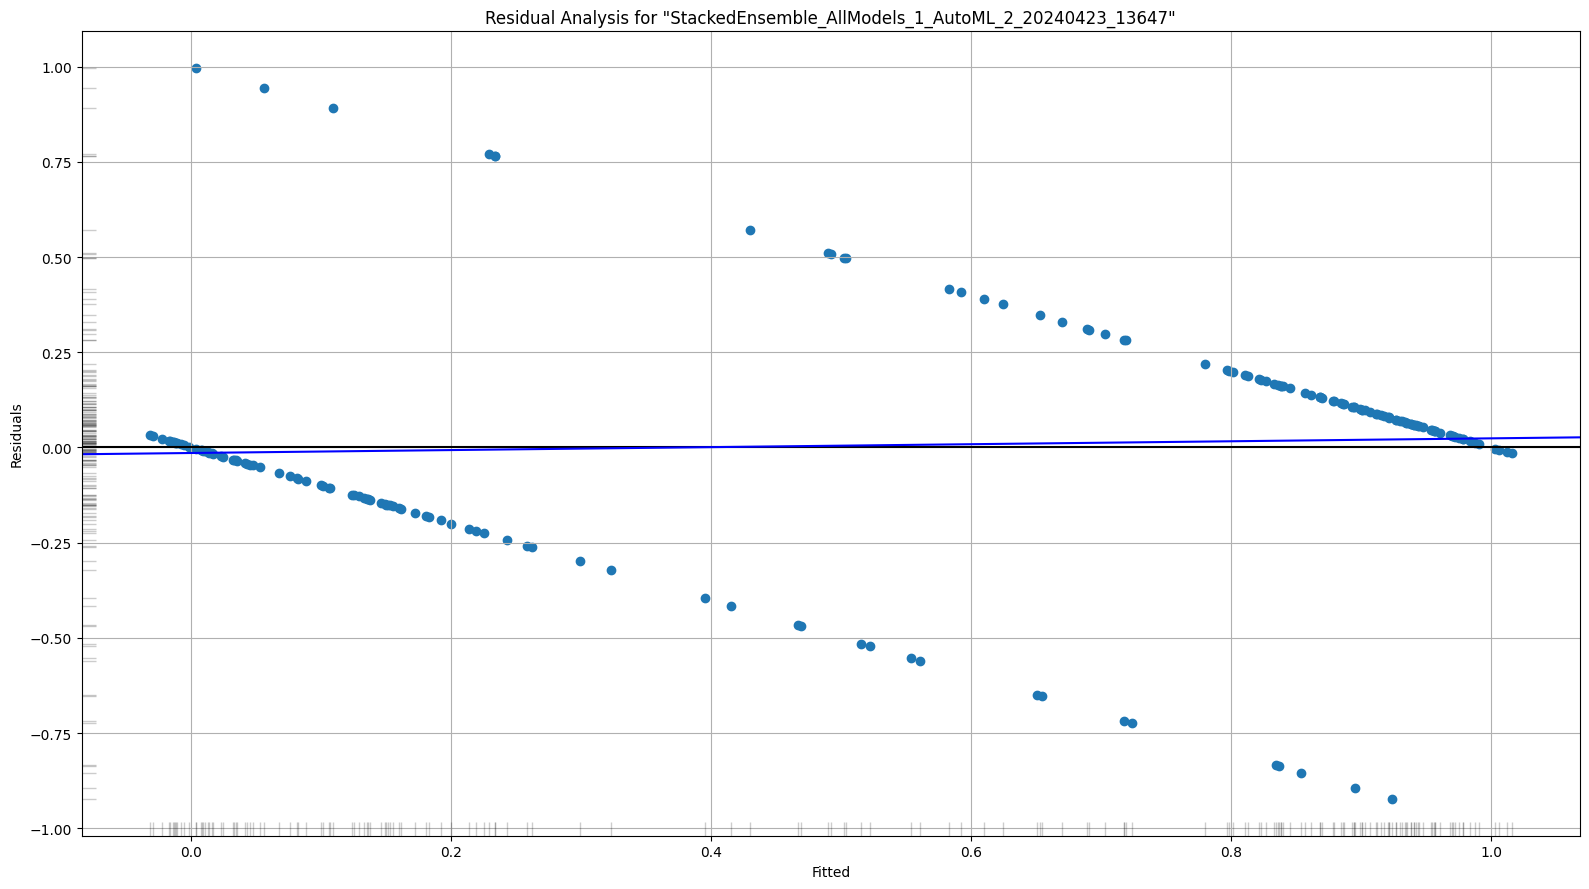

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

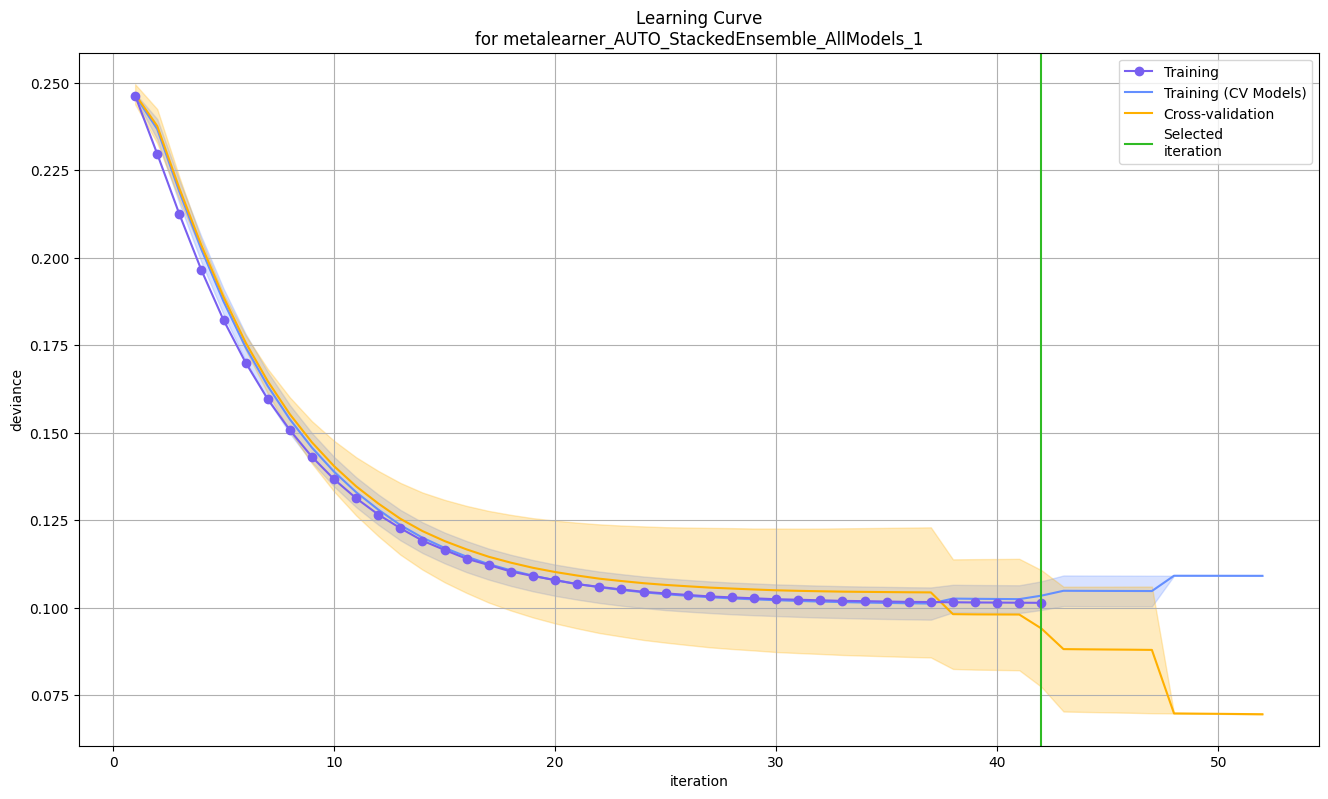

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

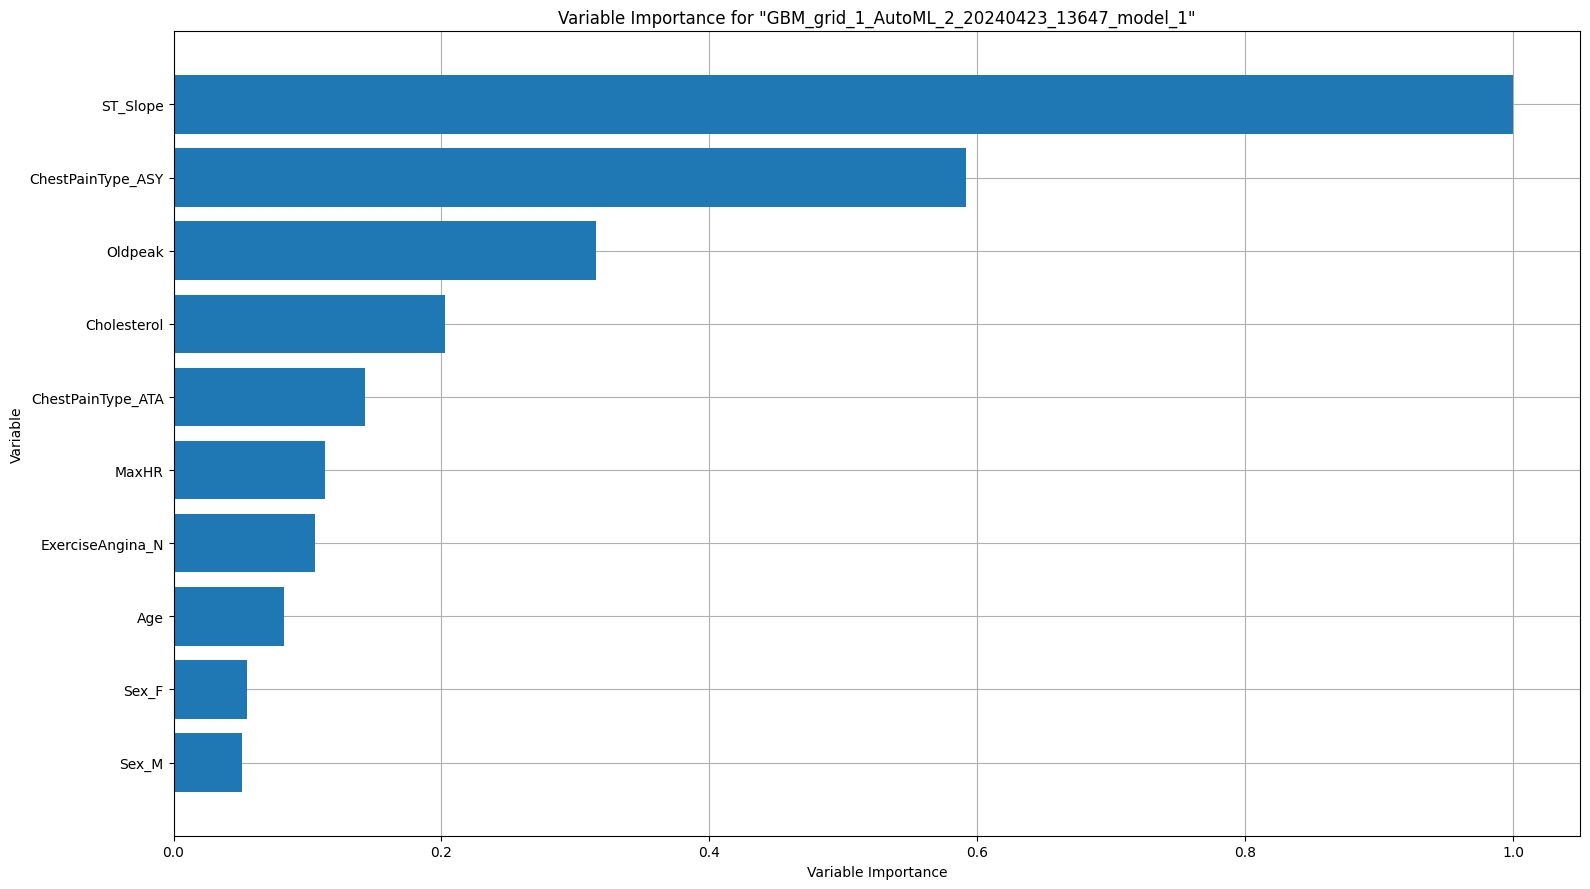

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

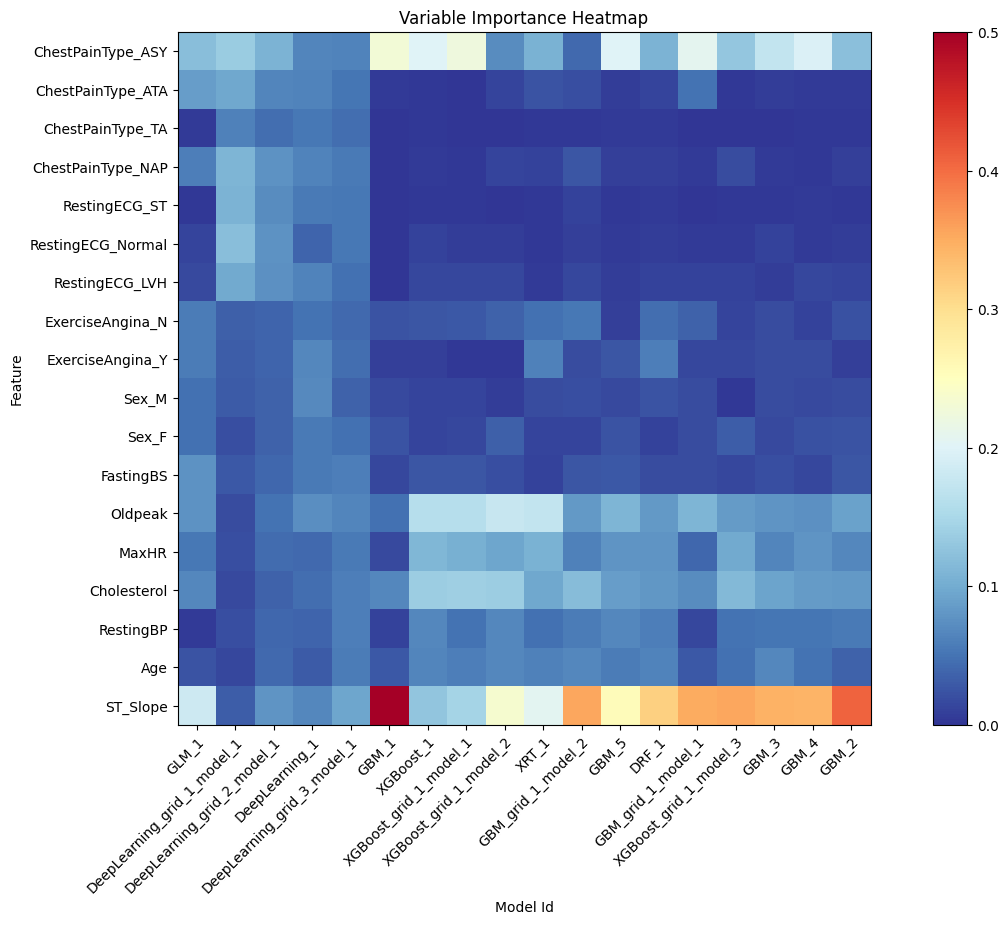

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

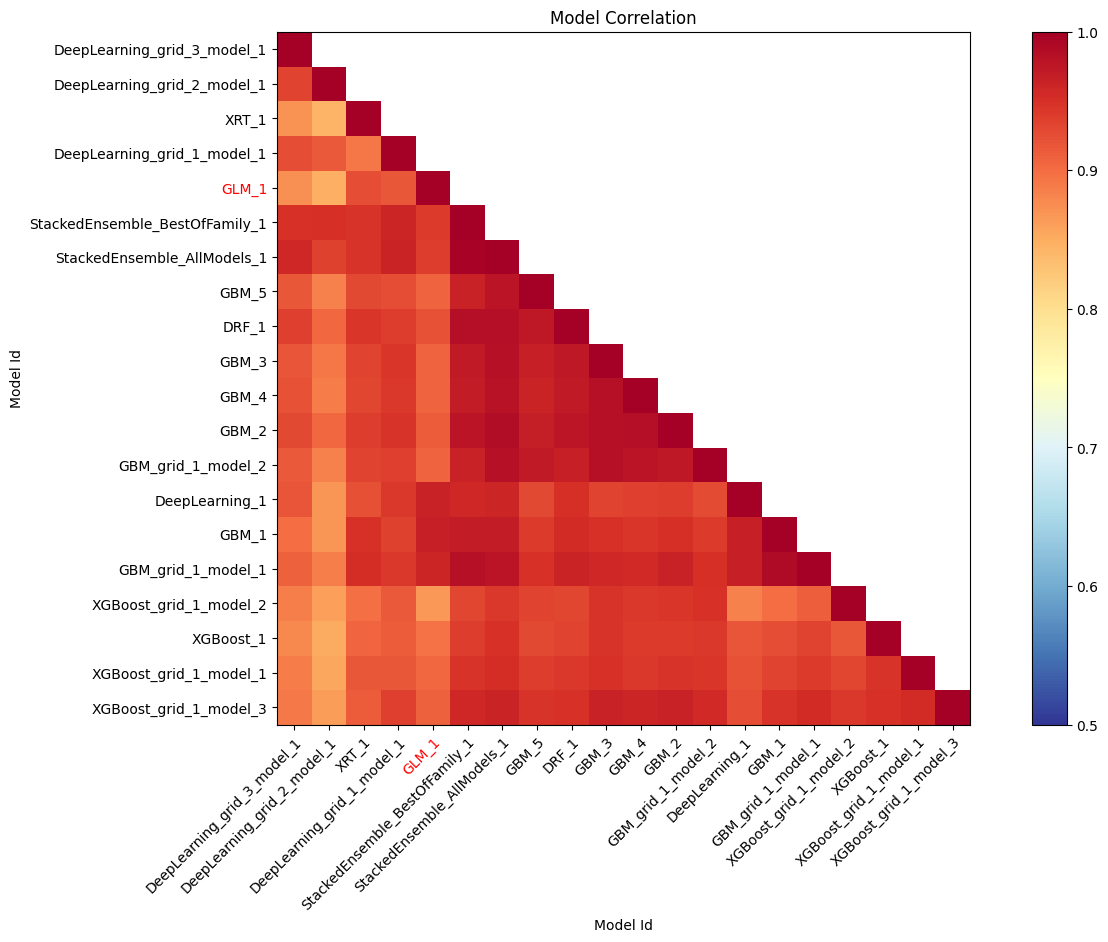

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

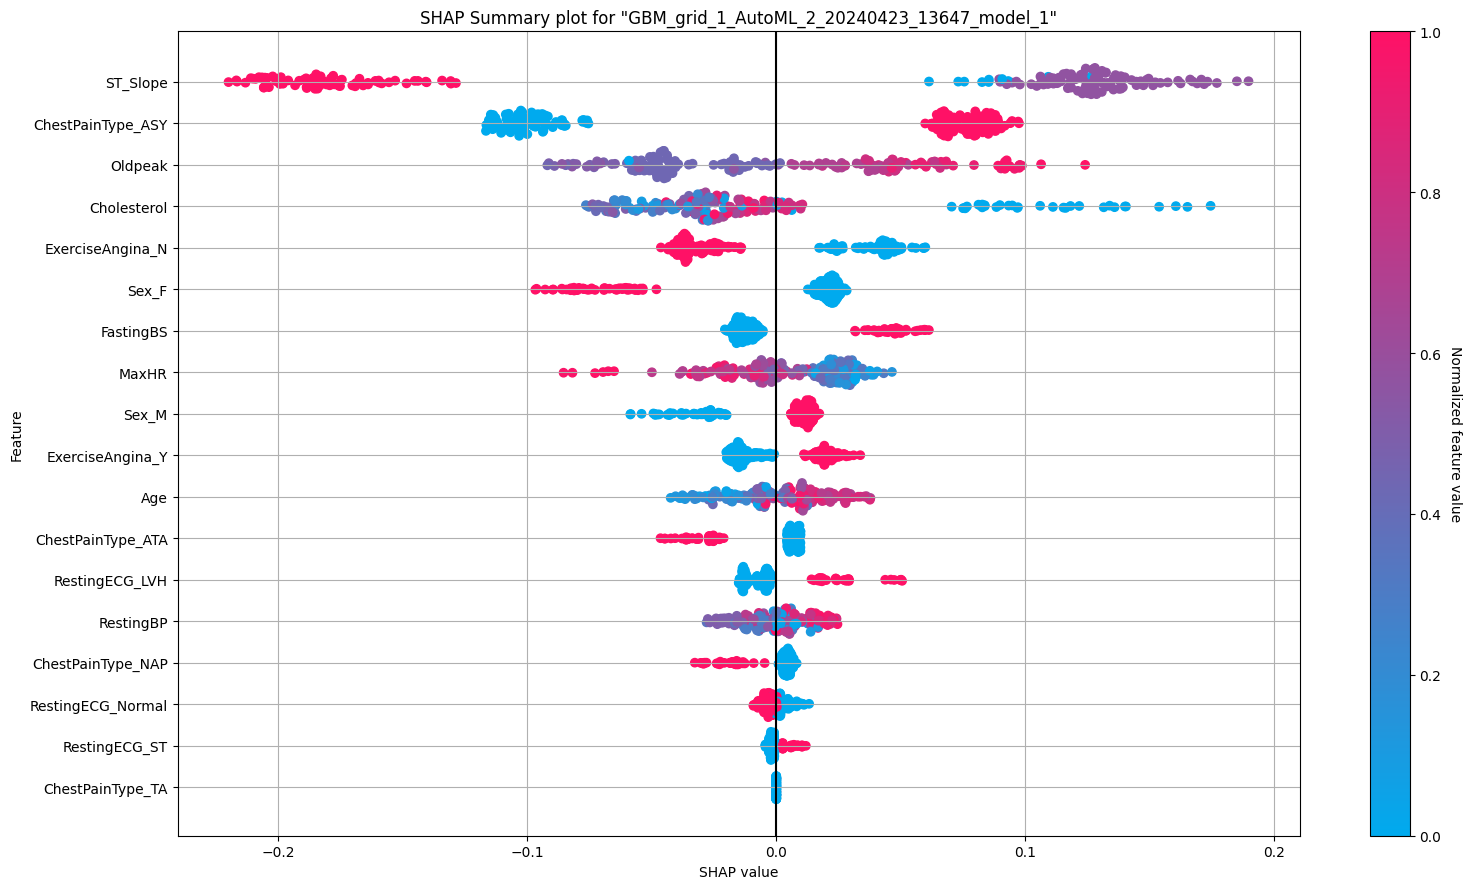

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

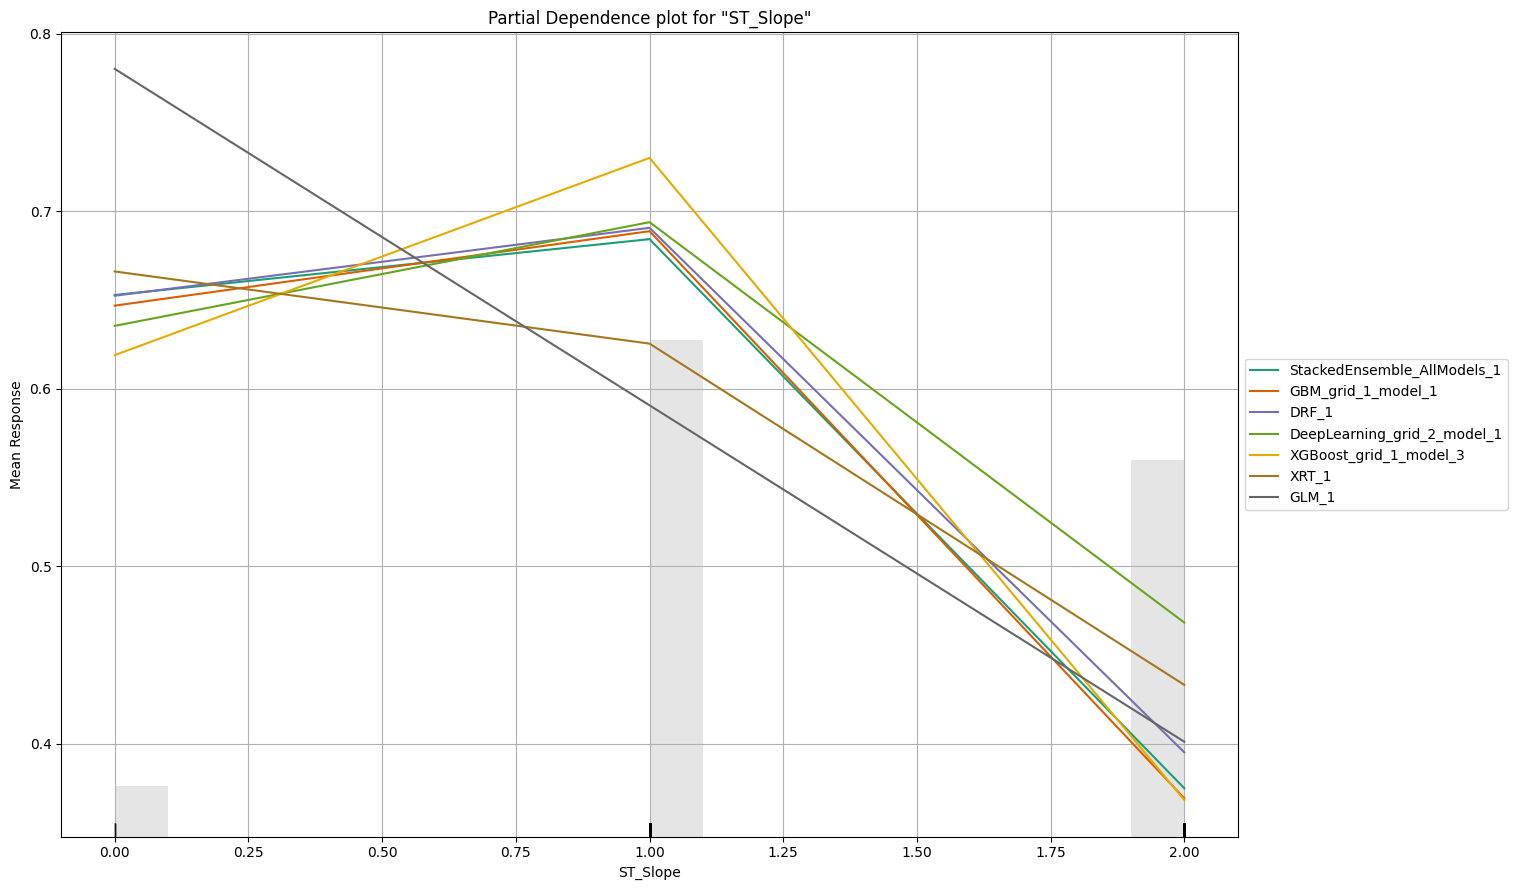

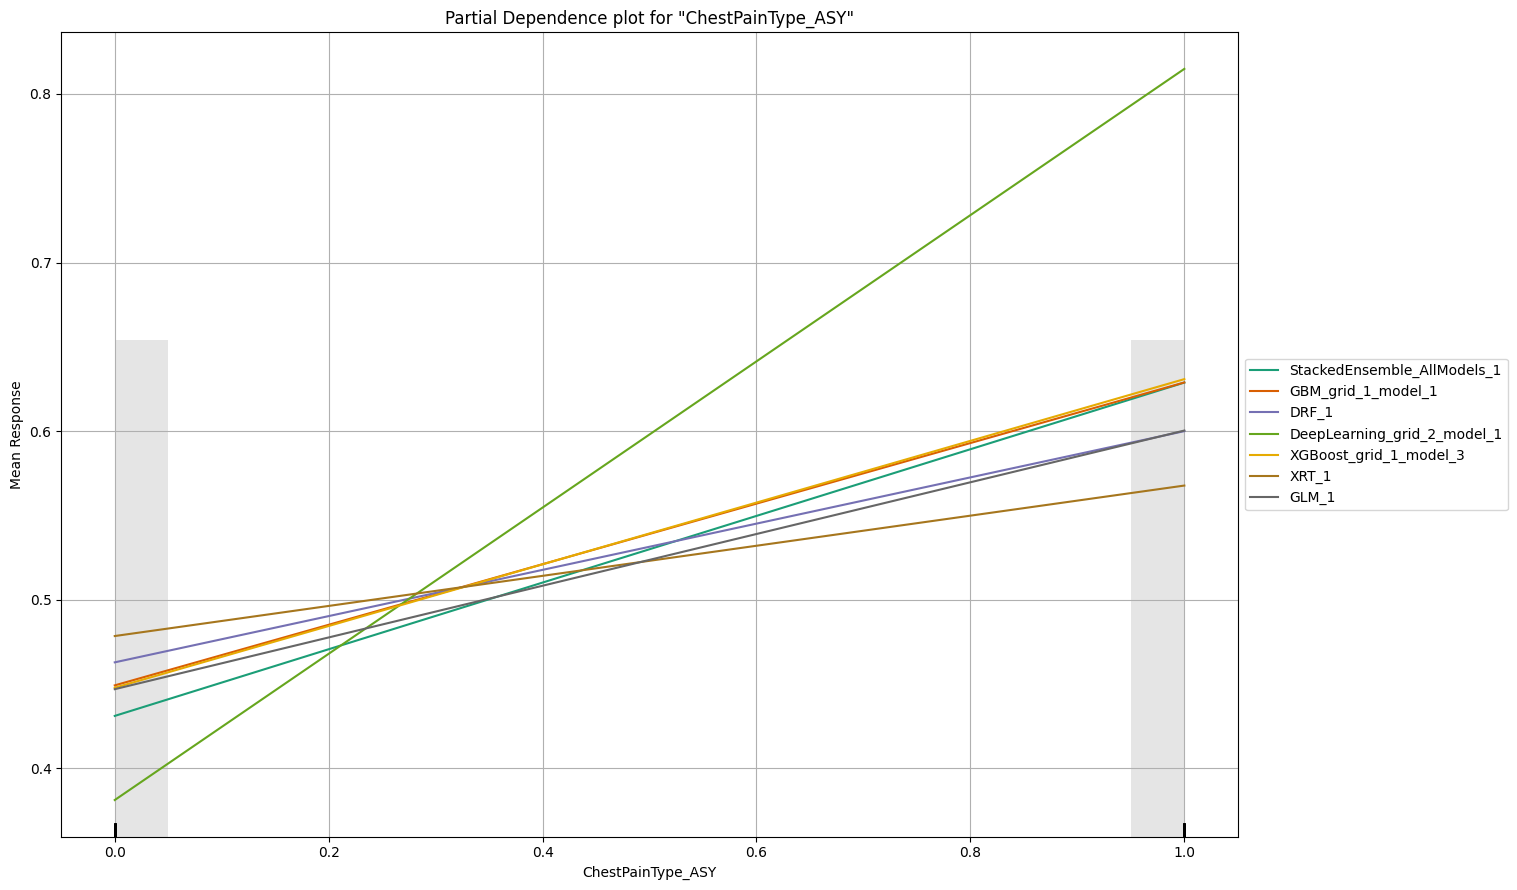

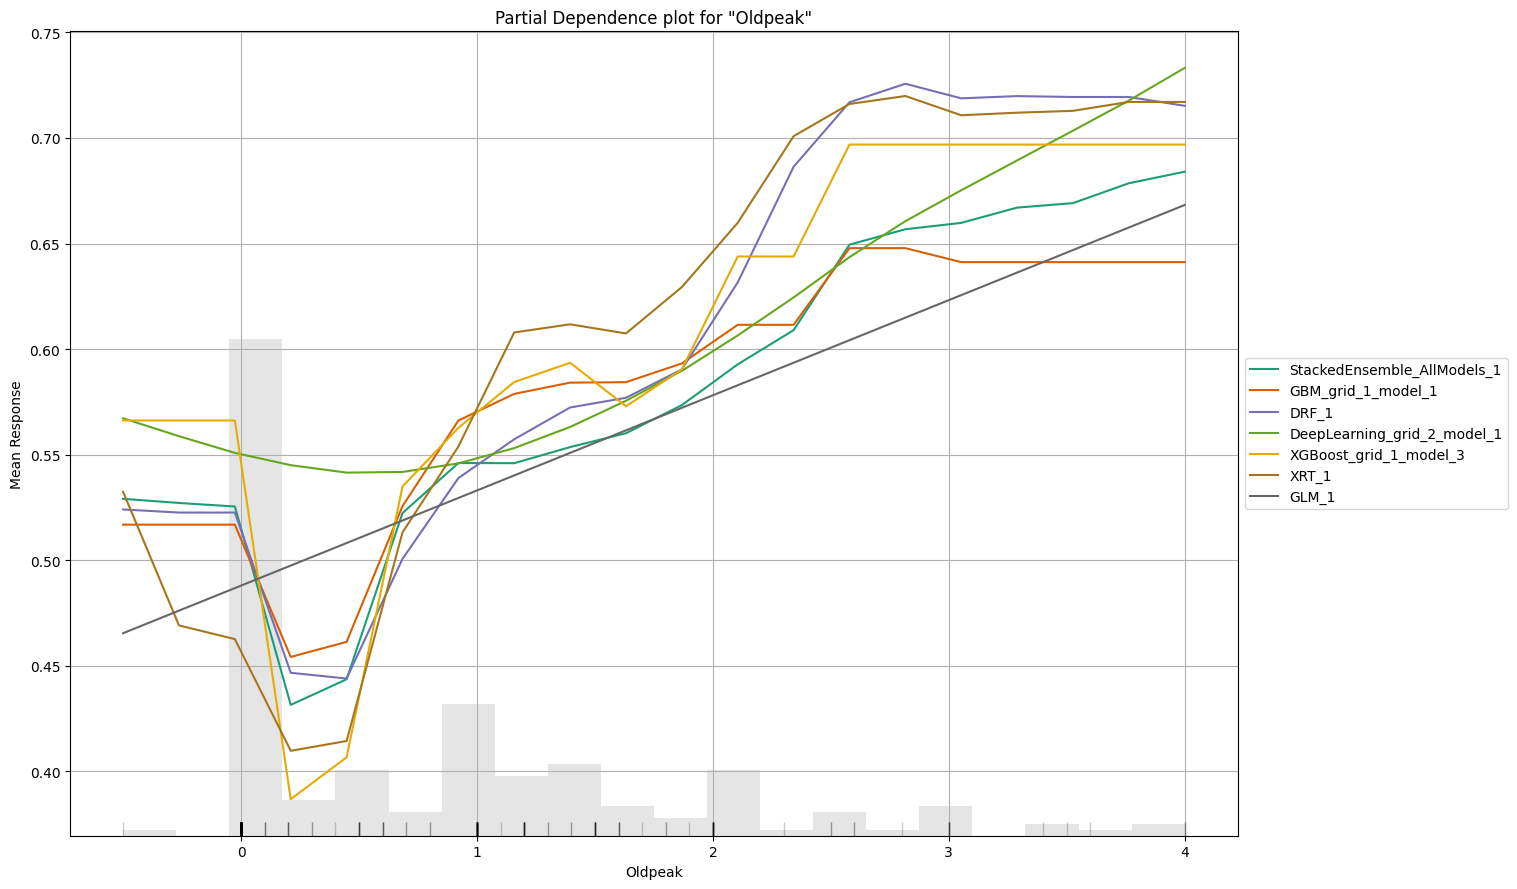

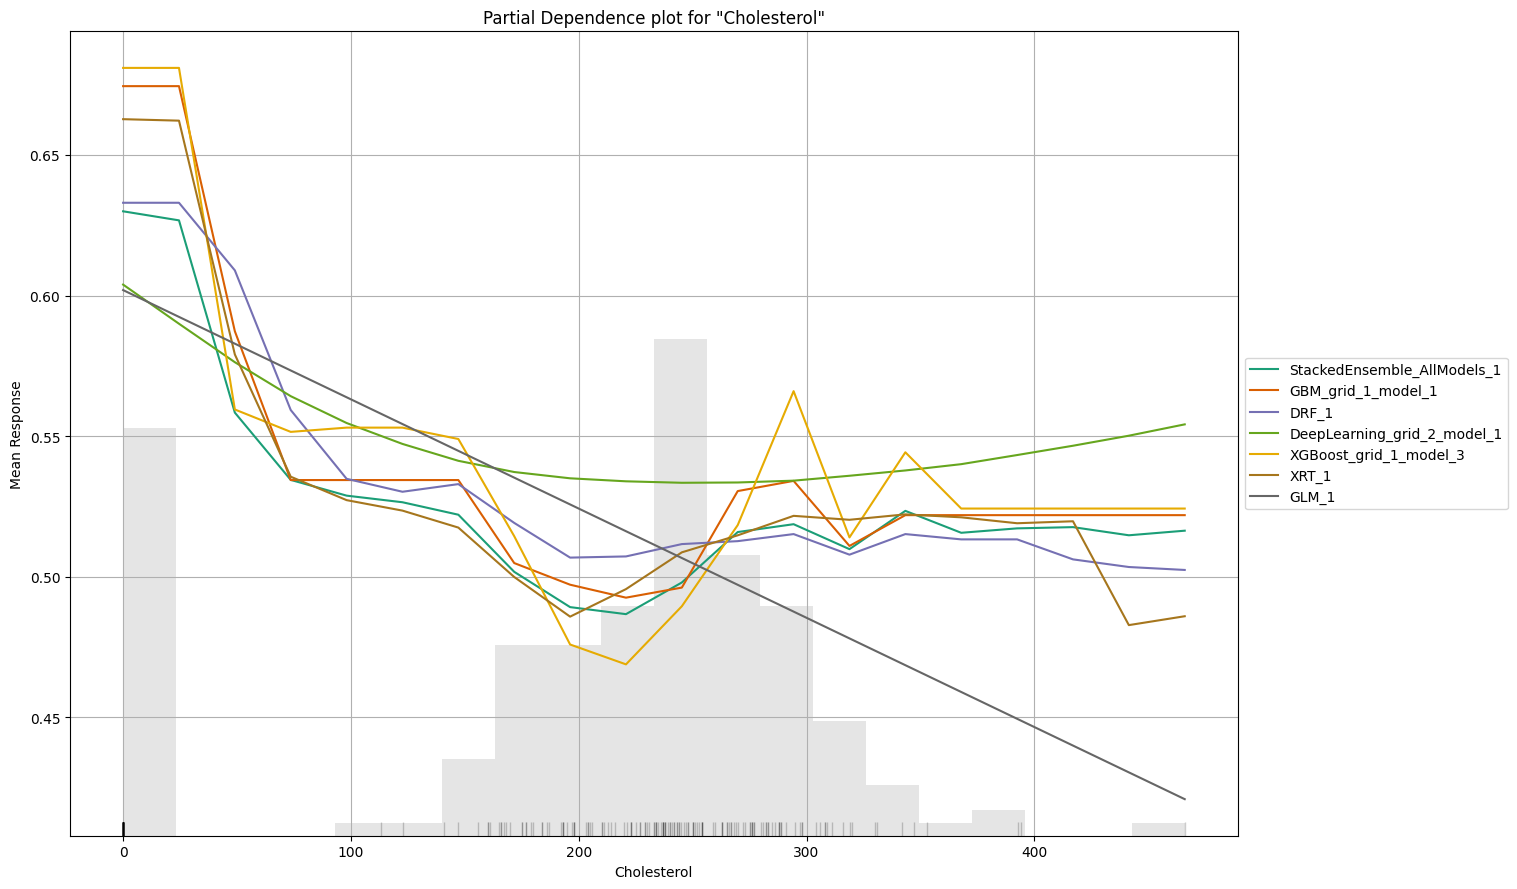

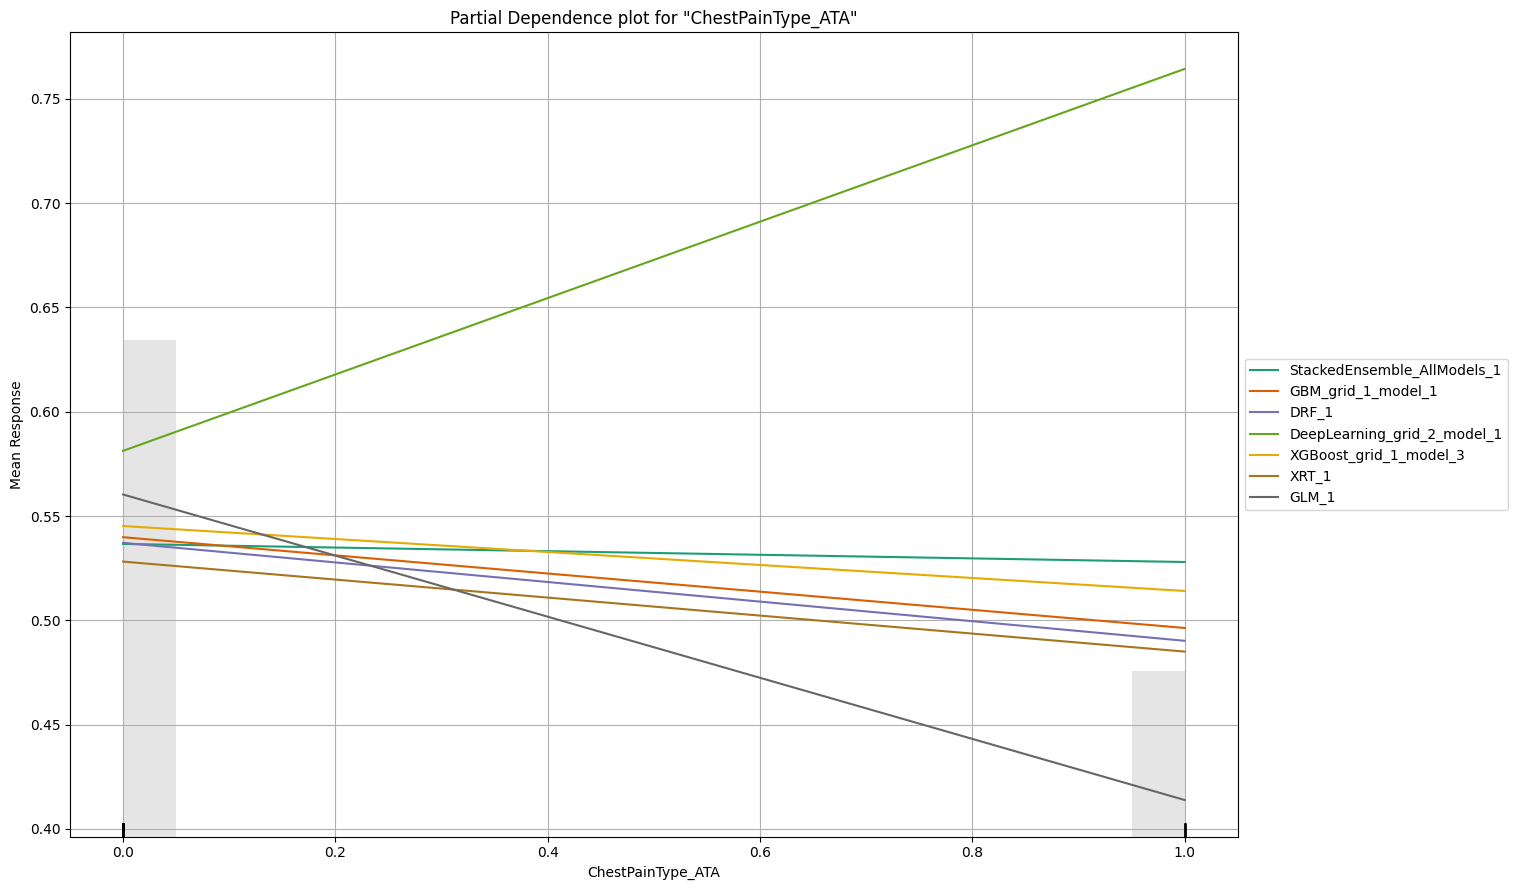

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

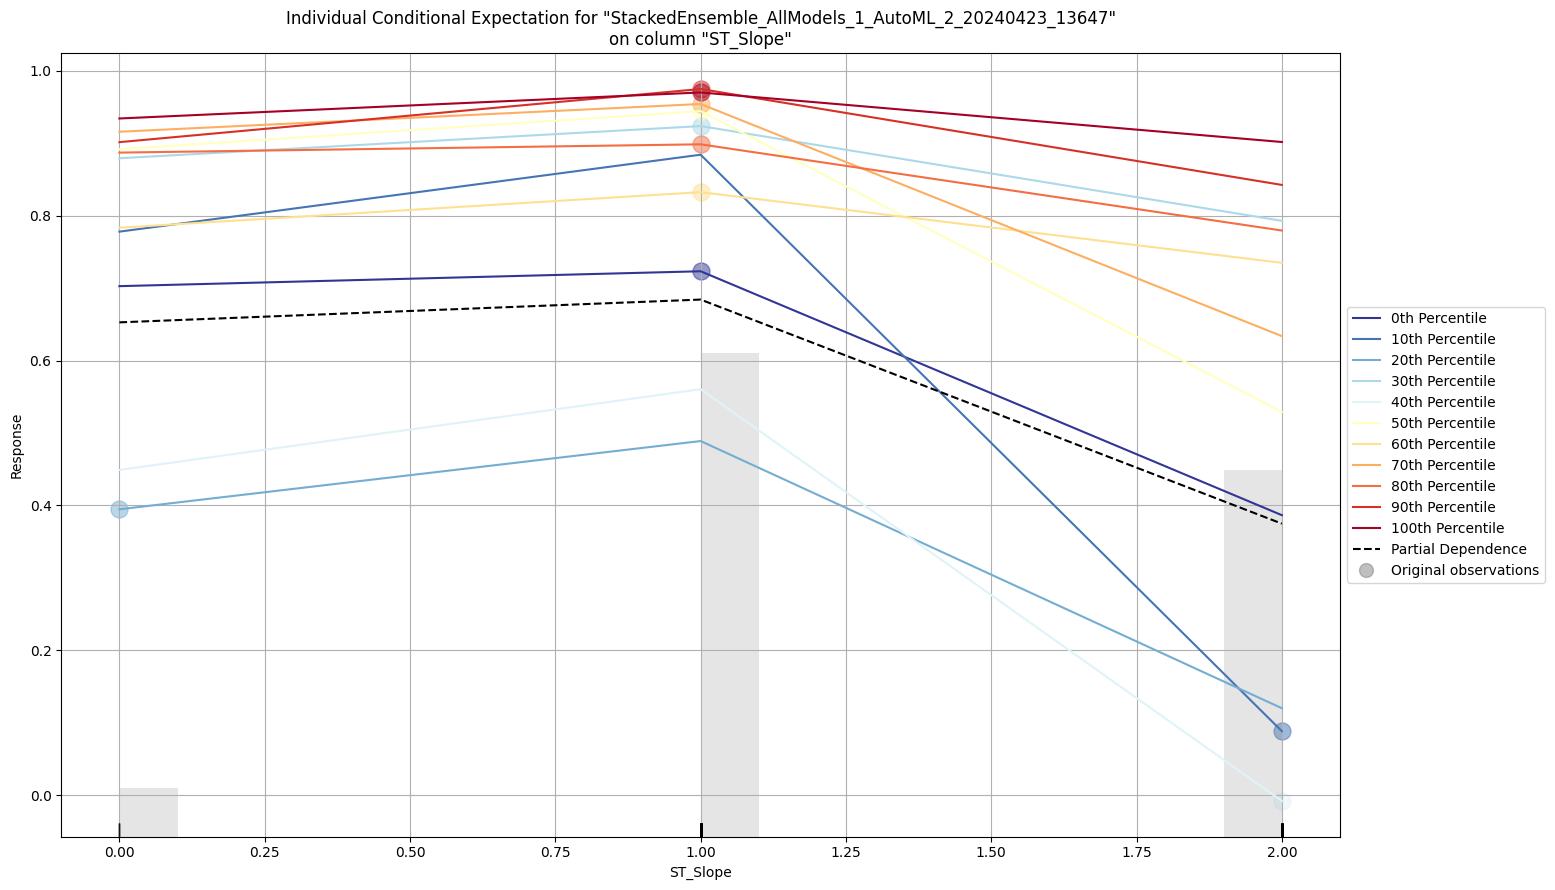

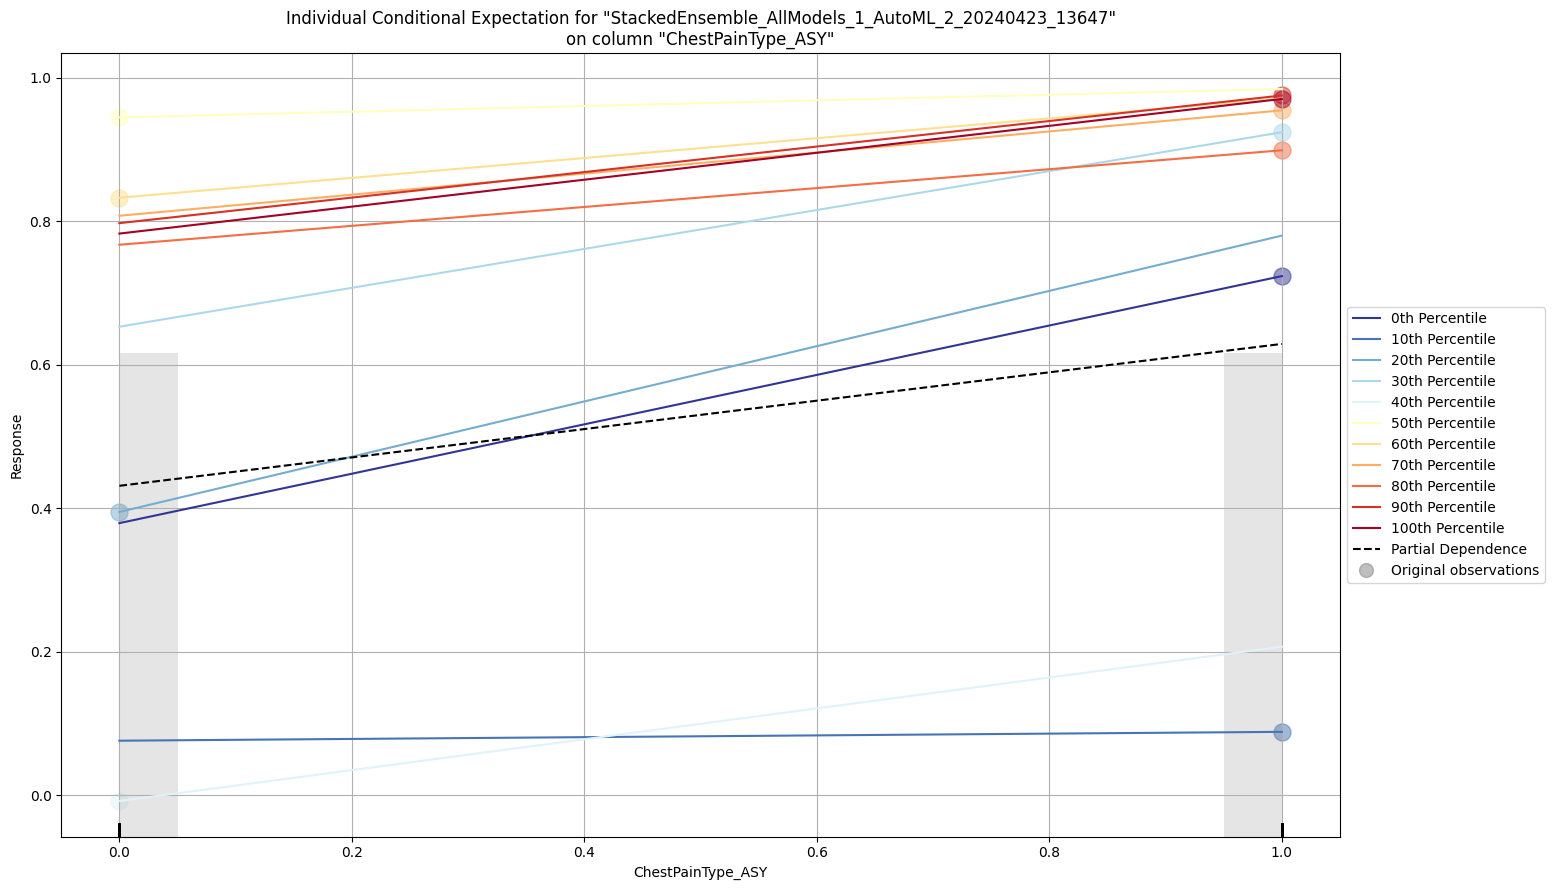

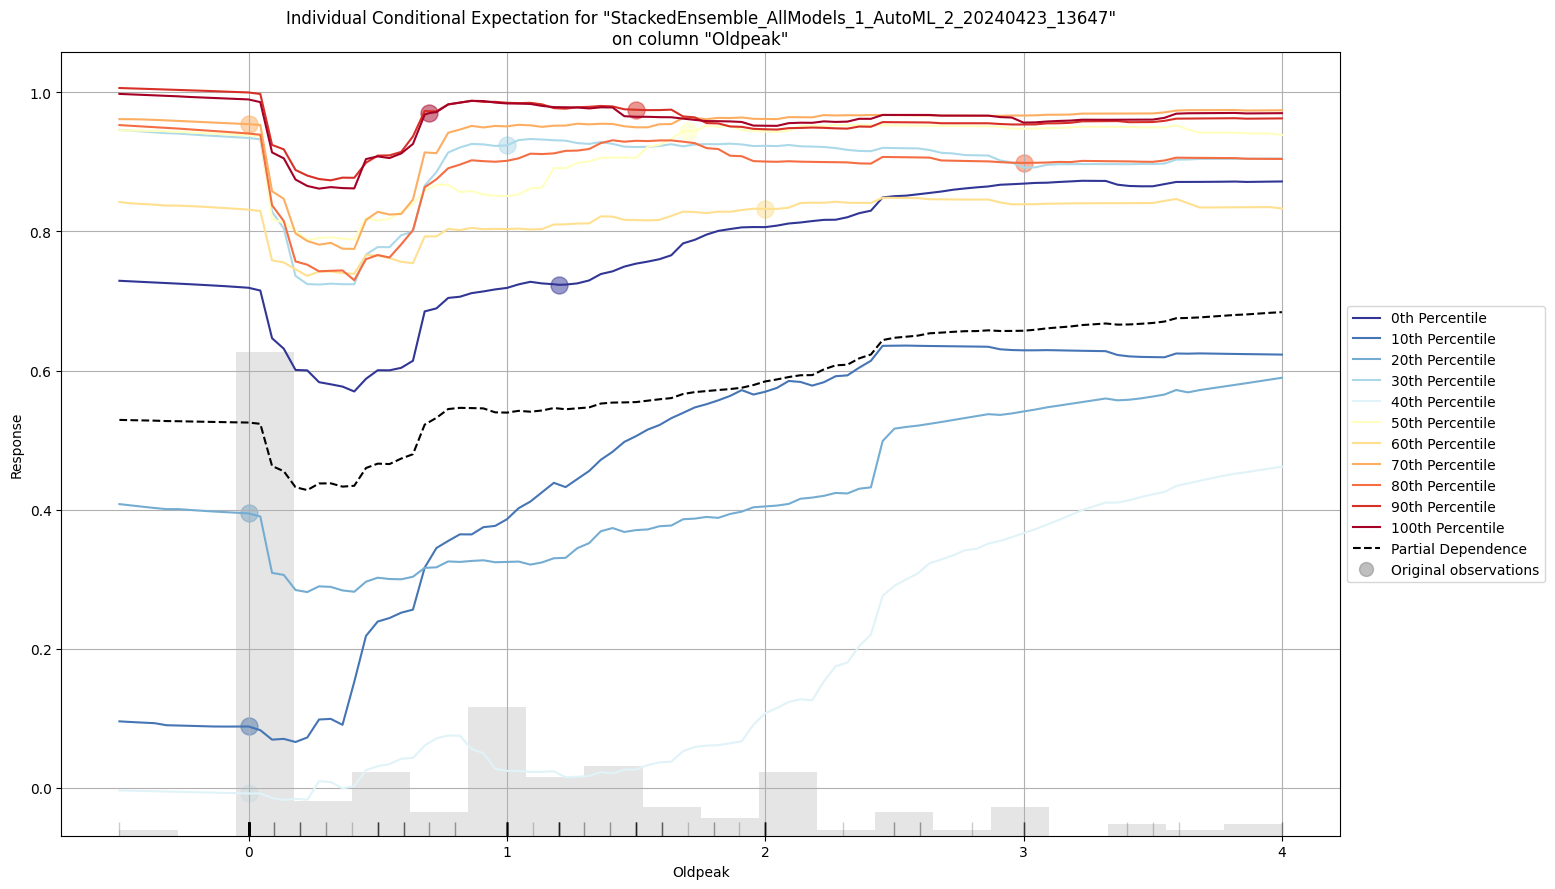

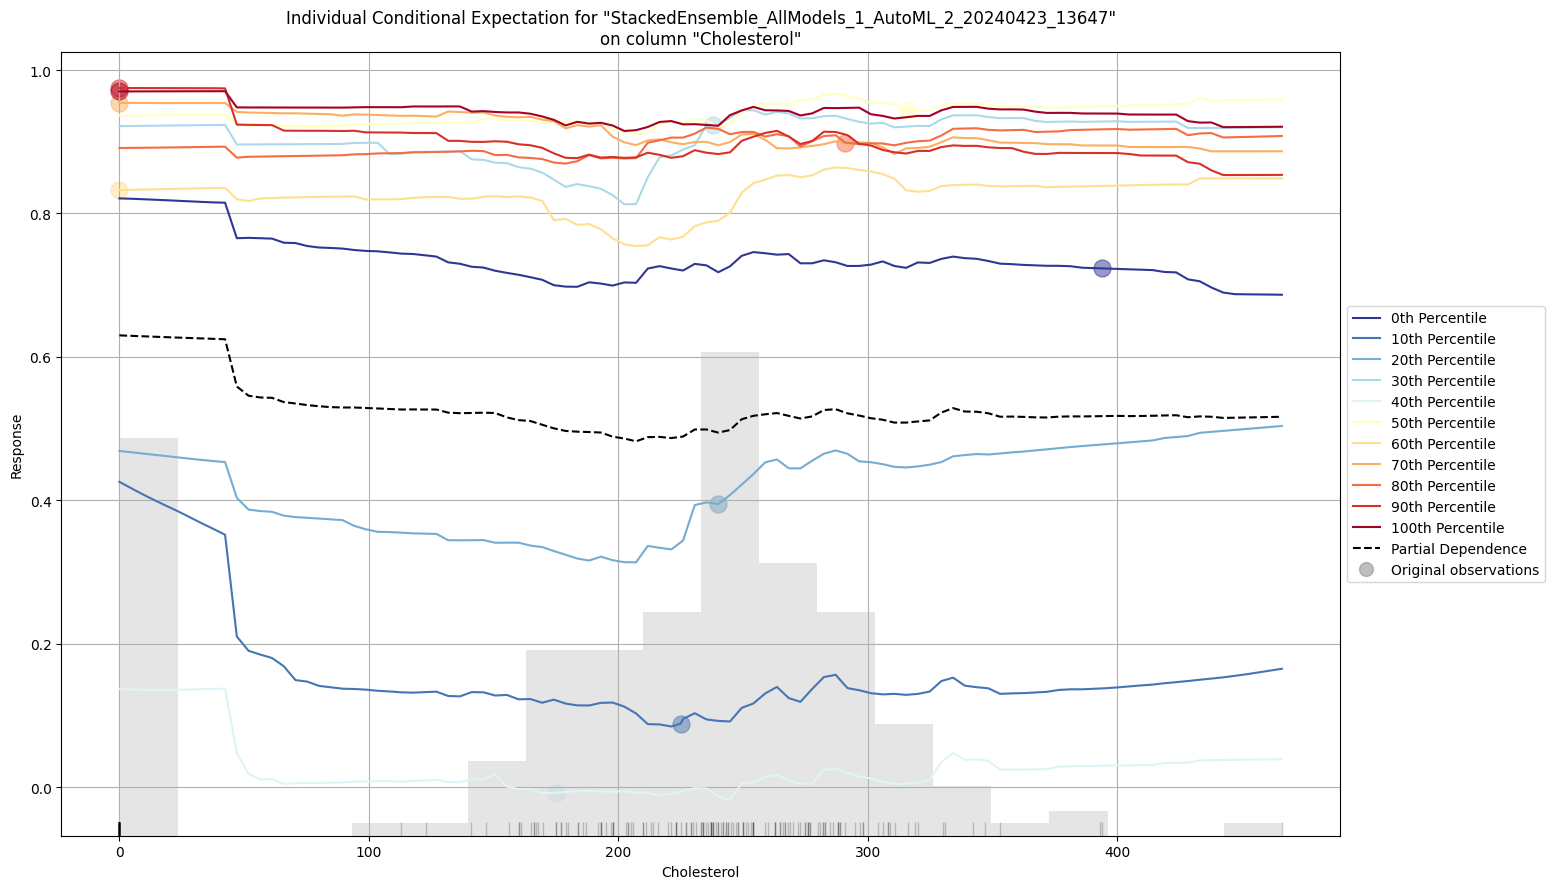

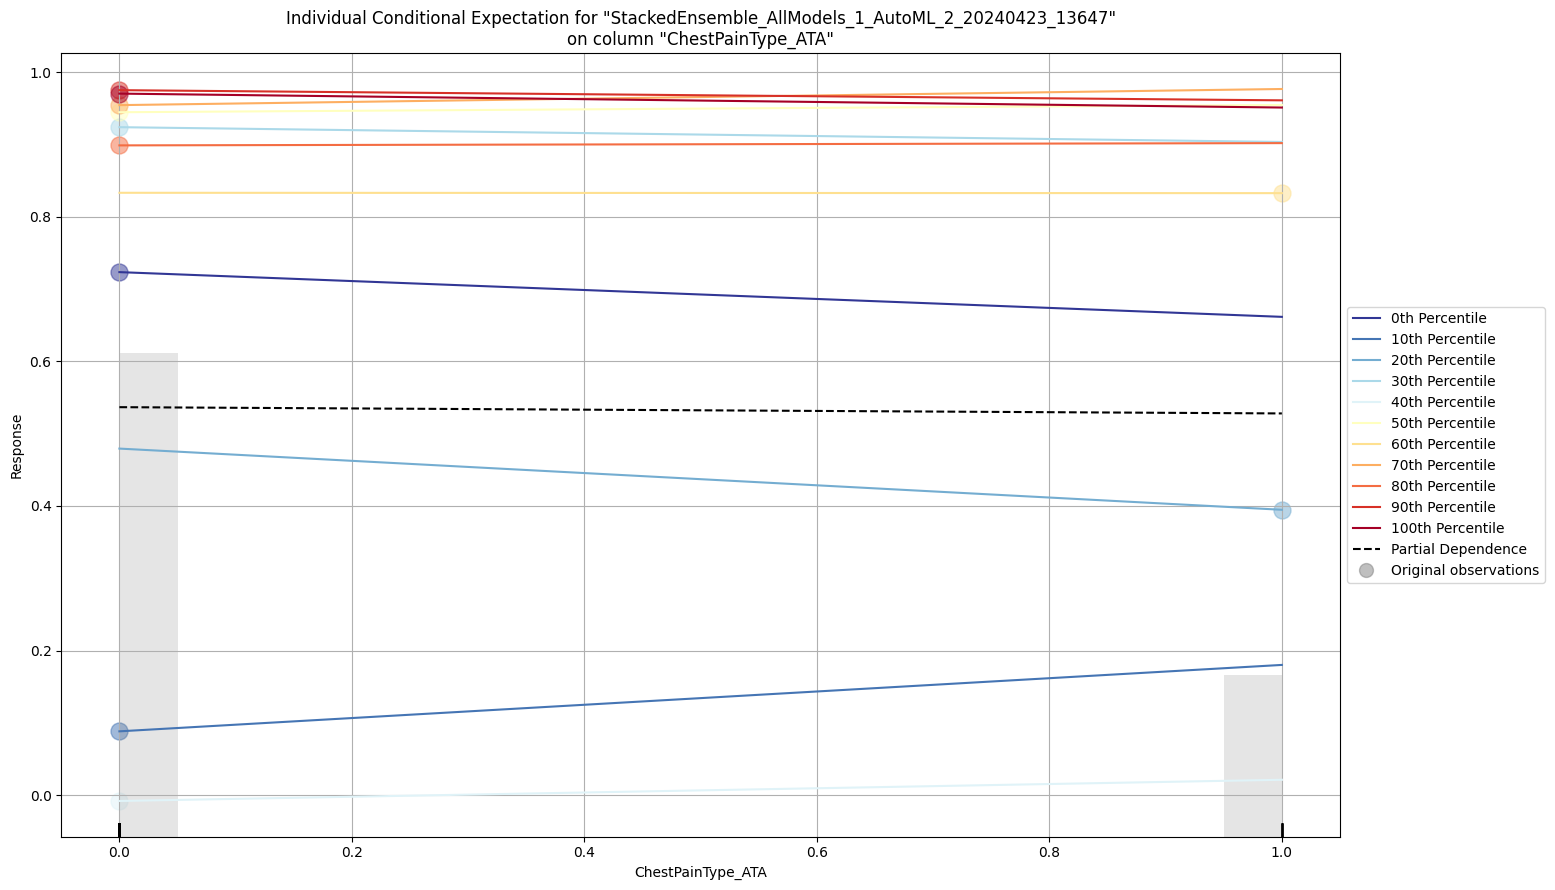



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f4232f25180>), ('description', <h2o.explanation._explain.Description object at 0x7f42369f0eb0>), ('data', H2OFrame({'_ex': <Expr(rows <Expr(makeLeaderboard ['StackedEnsemble_AllModels_1_AutoML_2_20240423_13647', 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240423_13647', 'GBM_grid_1_AutoML_2_20240423_13647_model_1', 'GBM_grid_1_AutoML_2_20240423_13647_model_2', 'GBM_4_AutoML_2_20240423_13647', 'GBM_2_AutoML_2_20240423_13647', 'DRF_1_AutoML_2_20240423_13647', 'GBM_1_AutoML_2_20240423_13647', 'GBM_5_AutoML_2_20240423_13647', 'DeepLearning_grid_2_AutoML_2_20240423_13647_model_1', 'DeepLearning_grid_3_AutoML_2_20240423_13647_model_1', 'GBM_3_AutoML_2_20240423_13647', 'DeepLearning_grid_1_AutoML_2_20240423_13647_model_1', 'XGBoost_grid_1_AutoML_2_20240423_13647_model_3', 'DeepLearning_1_AutoML_2_20240423_13647', 'XGBoost_grid_1_AutoML_2_20240423_13647_model_1', 'XRT_1_AutoML_2_20240423_1

In [120]:
from h2o import explanation
explanation = aml.explain(heart_test)
print(explanation)

In [121]:
predictions1 = aml.leader.predict(X_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [122]:
type(predictions1)

h2o.frame.H2OFrame

In [123]:
predictions1

predict
0.723342
0.0348628
0.894185
0.00886563
0.953351
0.938457
0.938551
0.853924
0.323063
0.972108


In [124]:
pre = predictions1.as_data_frame()
pre

,predict
0,0.723342
1,0.034863
2,0.894185
3,0.008866
4,0.953351
...,...
179,0.032675
180,0.553893
181,0.105792
182,-0.032060


In [125]:
pc = pre.copy()

In [126]:
pc

,predict
0,0.723342
1,0.034863
2,0.894185
3,0.008866
4,0.953351
...,...
179,0.032675
180,0.553893
181,0.105792
182,-0.032060


In [127]:
pc['predict'] = pc['predict'] * 100

In [128]:
pc

,predict
0,72.334163
1,3.486281
2,89.418461
3,0.886563
4,95.335139
...,...
179,3.267486
180,55.389263
181,10.579250
182,-3.205995


In [129]:
convert_func = lambda x: 1 if x > 66.5 else 0

# Apply the lambda function to the 'col' column
pc['predict'] = pc['predict'].apply(convert_func)

# Display the updated DataFrame
print(pc)

     predict
0          1
1          0
2          1
3          0
4          1
..       ...
179        0
180        0
181        0
182        0
183        1

[184 rows x 1 columns]


In [130]:
pc.value_counts()

predict
0          96
1          88
Name: count, dtype: int64

In [131]:
type(predictions1)
len(predictions1)

184

In [132]:
y_test=heart_test.as_data_frame()
Y_test=y_test['HeartDisease']
type(Y_test)
len(Y_test)

184

In [133]:
y_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,62,140,394,0,157,1.2,1,0,1,0,1,0,1,0,0,0,1,0,0
1,29,140,263,0,170,0.0,2,0,0,1,1,0,0,1,0,0,0,1,0
2,35,120,198,0,130,1.6,1,1,0,1,0,1,1,0,0,0,0,1,0
3,54,140,309,0,140,0.0,2,0,1,0,1,0,0,1,0,0,0,0,1
4,64,143,306,1,115,1.8,1,1,0,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,108,267,0,167,0.0,2,0,1,0,1,0,0,0,1,0,1,0,0
180,58,100,248,0,122,1.0,1,0,1,0,1,0,1,0,0,0,1,0,0
181,63,135,252,0,172,0.0,2,0,1,0,1,0,0,0,1,0,1,0,0
182,41,130,245,0,150,0.0,2,0,1,0,1,0,0,1,0,0,0,1,0


In [134]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pc)
print(cm)

[[80  7]
 [16 81]]


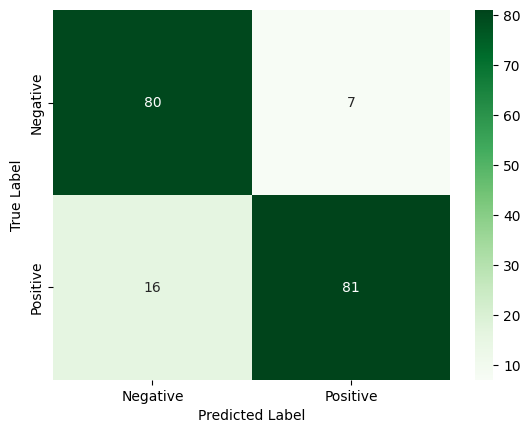

In [135]:
cm1gr = confusion_matrix(Y_test, pc)
sns.heatmap(cm1gr, annot=True, cmap="Greens", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(Y_test,pc)
print(report)
acc= accuracy_score(Y_test,pc)
print("Accuracy is: ",acc*100)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        87
           1       0.92      0.84      0.88        97

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy is:  87.5


In [137]:
import h2o

# Assuming h2o.init() has already been run in your notebook

# Replace 'best_model' with the variable that references your actual model.
# For example, if you have a model variable like `my_gbm_model`, you would use that.

model_path = h2o.save_model(model=best_model, path="/content/", force=True)

# If you want to download the model to your local computer:
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
heart_data = pd.read_csv("https://raw.githubusercontent.com/badani-yash/Heart-Disease-Prediction/main/heart.csv")

In [142]:
heart_data.select_dtypes(include="object").columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [143]:
heart_data_encodded = pd.get_dummies(data=heart_data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                             drop_first="True")*1

heart_data_encodded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [144]:
X = heart_data_encodded.drop(columns=["HeartDisease"])
y = heart_data_encodded["HeartDisease"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [150]:
# Create The Model
from xgboost import XGBClassifier
model = XGBClassifier()

# Used Hyperparameter
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'gamma': [0, 0.25, 0.4, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

In [152]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=35,
                                   scoring="roc_auc", cv=5, verbose=0, random_state=99)

In [153]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=35,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.4, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=99, scoring='roc_auc')

In [154]:
p = random_search.best_params_
for k, v in p.items():
    print(f"{k}={v},")

subsample=0.7,
min_child_weight=3,
max_depth=3,
learning_rate=0.1,
gamma=0,
colsample_bytree=0.5,


In [155]:
model = XGBClassifier(
objective="binary:logistic",
subsample=0.7,
min_child_weight=3,
max_depth=3,
learning_rate=0.1,
gamma=0,
colsample_bytree=0.5,
)

In [156]:
# Cross Validation Score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv = kf)

print(f"CROSS VALIDATION SCORE: {np.mean(scores)*100:0.2f}%")


CROSS VALIDATION SCORE: 88.23%


In [157]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)*100
print(f"TRAINING SCORE {train_score:0.2f}%")

TRAINING SCORE 91.14%


In [158]:
predictions = model.predict(X_test)
test_score = accuracy_score(y_test, predictions)*100
print(f"TEST SCORE {test_score:0.2f}%")

TEST SCORE 92.93%


In [159]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.94      0.93      0.93        98

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.93      0.93      0.93       184



In [164]:
import plotly.express as px
from plotly.offline import iplot

In [165]:
cm = confusion_matrix(y_test, predictions)
ticks = heart_data["HeartDisease"].map({0:"No Heart Disease", 1:"Heart Disease"}).unique()

fig = px.imshow(cm, aspect=True, text_auto=True, x=ticks, y=ticks,
          color_continuous_scale="RdBu", title="Confusion Matrix")
iplot(fig)

In [174]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('xgboost_hear_disease_detection_v1.pkl')
print(projectabspathname)
projectname = 'Untitled2 (2).ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

/content/xgboost_hear_disease_detection_v1.pkl
